# Part 2 : Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

<font color = 'blue' size='4'>Q1.Import required libraries and read the dataset.

In [1]:
# Numerical libraries
import math
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
hprod = pd.read_csv('honeyproduction.csv')

<font color='blue' size='4'>Q2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
hprod.shape

(626, 8)

In [4]:
hprod.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [6]:
hprod.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [7]:
hprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [7]:
hprod.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,626,44,AL,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numcol,626.0,NaN,NaN,NaN,60284.345048,91077.087231,2000.0,9000.0,26000.0,63750.0,510000.0
yieldpercol,626.0,NaN,NaN,NaN,62.009585,19.458754,19.0,48.0,60.0,74.0,136.0
totalprod,626.0,NaN,NaN,NaN,4169086.261981,6883846.751268,84000.0,475000.0,1533000.0,4175250.0,46410000.0
stocks,626.0,NaN,NaN,NaN,1318859.42492,2272963.665923,8000.0,143000.0,439500.0,1489500.0,13800000.0
priceperlb,626.0,NaN,NaN,NaN,1.409569,0.638599,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,NaN,NaN,NaN,4715741.214058,7976109.76856,162000.0,759250.0,1841500.0,4703250.0,69615000.0
year,626.0,NaN,NaN,NaN,2004.864217,4.317306,1998.0,2001.0,2005.0,2009.0,2012.0


<font size=4, color = 'green'> Observations:

1. we can see the data is eqaully distributed in all rows and we are not having values missed in rows  
2. yieldpercol has maximum of 136 & minimum of 19 which says honey per yield colony is high at this rates
3. we can say in year 2012 we had maximum yeild 

<font color='blue' size='4'>Q3. Display the percentage distribution of the data in each year using the pie chart.

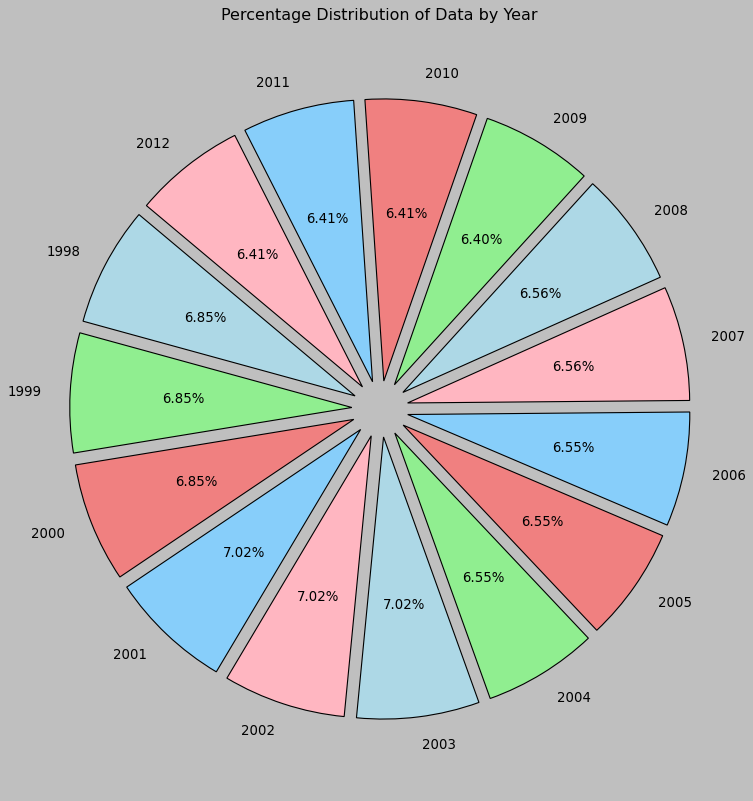

In [20]:
# Grouping data by 'year' and calculate the sum for each year
yearly_data = hprod.groupby('year')['year'].sum()  

# Calculating the percentage distribution
total_sum = yearly_data.sum()
percentage_distribution = (yearly_data / total_sum) * 100


color_arr = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
explode = [0.1] + [0.1] * (len(percentage_distribution) - 1)
# Creating a pie chart
plt.figure(figsize=(10, 12))
plt.title('Percentage Distribution of Data by Year')
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.2f%%', startangle=140,colors=color_arr,explode=explode)
plt.axis('equal') 
plt.show()

<font color='blue' size='4'> Q4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

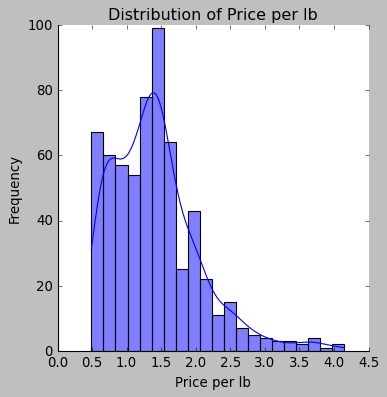

In [21]:
sns.displot(data=hprod, x='priceperlb', kde=True)  # 'kde=True' adds a Kernel Density Estimate plot

# Add title and labels
plt.title('Distribution of Price per lb')
plt.xlabel('Price per lb')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Observations:The average price per pound we can see the price at 1.5 $ we are having maximum count as per distribution
    and the price after 4 $ is almost negligible as per distribution  and price from 0.5 to 1.5 we can see maximum distribution. 
    

<font color='blue' size='4'> Q5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

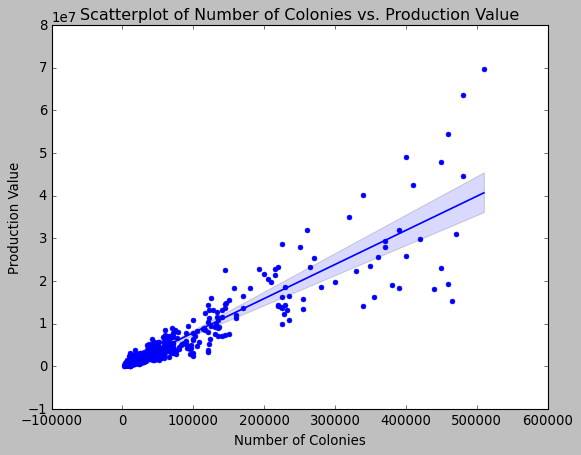

In [22]:
# Create a scatterplot using scatterplot function
sns.scatterplot(data=hprod, x='numcol', y='prodvalue')
sns.regplot(data=hprod, x='numcol',y='prodvalue') #adding trendiline

# Add title and labels
plt.title('Scatterplot of Number of Colonies vs. Production Value')
plt.xlabel('Number of Colonies')
plt.ylabel('Production Value')

# Show the plot
plt.show()

Observations : We can see at the number of colonies in range of 1 to 10000 has almost production value in 0 to 1 
and from maximum production is we can see at 500000 with production value of 7 this says total production x priceperlb is at 7

<font color='blue' size='4'> Q6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings

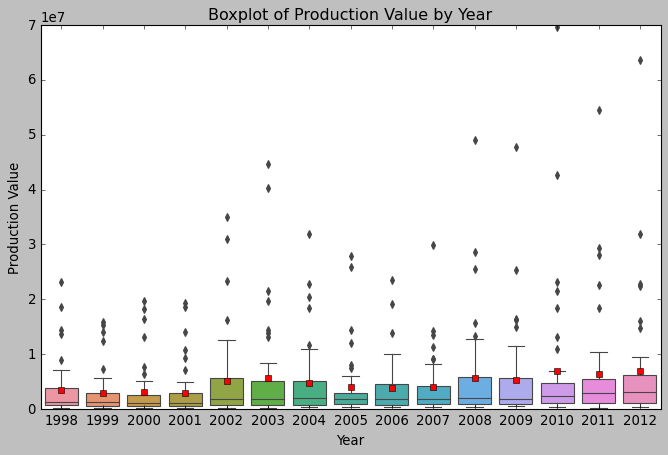

In [47]:
# Create a boxplot using boxplot function
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.boxplot(data=hprod, x='year', y='prodvalue',showmeans=True)

# Add title and labels
plt.title('Boxplot of Production Value by Year')
plt.xlabel('Year')
plt.ylabel('Production Value')

# Show the plot
plt.show()


Median Production Value: The height of the box (the middle line inside the box) represents the median production value for each year. for which we can compare the medians across different years to see if there's a noticeable trend in the production value(prodvalue).

Variability: The size of the box and the length of the whiskers provide information about the variability of 'prodvalue' for each year. A larger box indicates a wider range of values for that year. by which we can say year 2002,2008,2012 have more production value

Outliers: Individual data points that lie outside the whiskers are considered outliers. Outliers might indicate unusually high or low production values for a particular year.

Year-to-Year Changes: The distribution of 'prodvalue' across different years can reveal whether there are any significant changes or trends over time.

<font color='blue' size='4'>Q7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

In [49]:
hprod.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [32]:
hprod['year'].value_counts().sort_values(ascending=True)

2009    40
2010    40
2011    40
2012    40
2004    41
2005    41
2006    41
2007    41
2008    41
1998    43
1999    43
2000    43
2001    44
2002    44
2003    44
Name: year, dtype: int64

In [35]:
years = hprod['year'].unique()
years

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

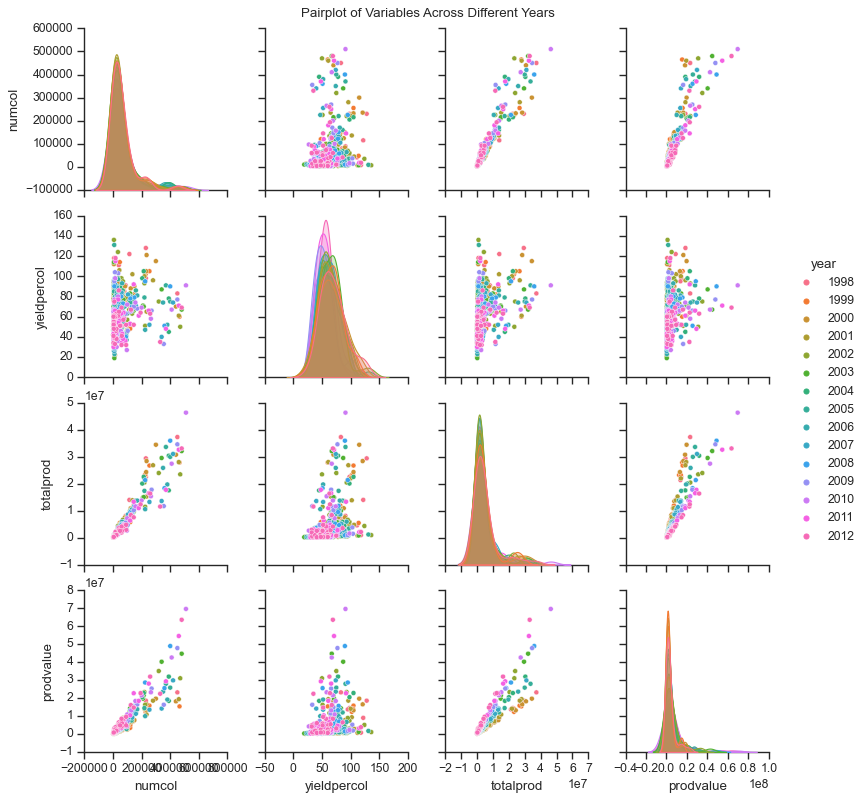

In [51]:
# Selecting the relevant columns to implement pair plot
selected_columns = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']
hprod_selected = hprod[selected_columns]

# Specifying a custom color palette with enough unique colors to get for all years
custom_palette = sns.color_palette("husl", n_colors=len(years))

# Creating a pairplot using Seaborn with the custom palette created above for all years
sns.set(style="ticks")
sns.pairplot(data_selected, hue='year', diag_kind='kde', palette=custom_palette)

# Adding title to the pairplot
plt.suptitle('Pairplot of Variables Across Different Years', y=1)

# displaying the plots
plt.show()


1)The diagonal represents the distribution of each individual variable. These plots show how the distribution of each variable changes across different years. For which, we can see how the distribution of 'Number of honey producing colonies.' or 'Value of production (total prod x priceperlb)' changes over time. i.e in 2012 & 2011 we have more yield in colonies & production 

2)the points in the 'prodvalue' vs. 'total prod' plot tend to form an upward-sloping line for each year, it suggests a positive relationship between these variables which says on total production increase value of production increasing. 


<font color='blue' size='4'> Q8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

<Axes: >

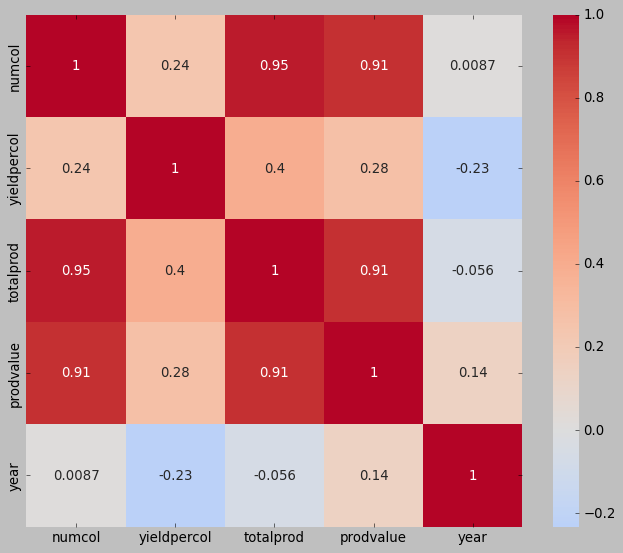

In [76]:
# Calculate the correlation matrix
correlation_matrix = hprod[cols].corr()

# Create a heatmap using seaborn's heatmap function
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

The heatmap here displays correlation values as colors. Warmer colors (e.g., red) indicate positive correlations, while cooler colors (e.g., blue) indicate negative correlations. The intensity of the color represents the strength of the correlation.

Positive Correlations: Positive correlations are indicated by values close to 1. For example, ['total prod' and 'prodvalue'],[prodvalue and numcol],[total prod and numcol] have a positive correlation close to 1 i.e 0.91,0.91,0.95, it suggests that an increase in total production tends to be associated with higher production values.

Negative Correlations: Negative correlations are indicated by values close to -1. ['price per lb' and 'yield percol' ]have a negative correlation close to -1, it means that higher prices per pound are associated with lower yields per colony.
